In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  matplotlib.image as mpimg
import tensorflow as tf
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
path_organic = "DATASET/TRAIN/O"
path_recyclabe = "DATASET/TRAIN/R"
path_organic_list = []
path_recyclabe_list = []

for fichier in os.listdir(path_organic):
    if fichier.lower().endswith(('.png', '.jpg', '.jpeg')):
        chemin_image = os.path.join(path_organic, fichier)
        # img = cv2.imread(chemin_image, cv2.IMREAD_COLOR)
        path_organic_list.append(chemin_image)

for fichier in os.listdir(path_recyclabe):
    if fichier.lower().endswith(('.png', '.jpg', '.jpeg')):
        chemin_image = os.path.join(path_recyclabe, fichier)
        # img = cv2.imread(chemin_image, cv2.IMREAD_COLOR)
        path_recyclabe_list.append(chemin_image)

nbr_oraganic = np.random.randint(0, len(path_organic_list))

nbr_recyclabe = np.random.randint(0, len(path_recyclabe_list))



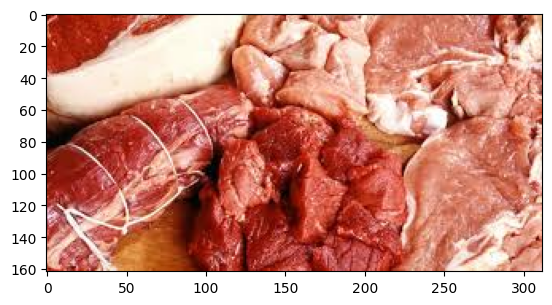

In [23]:
imr_o = mpimg.imread(path_organic_list[nbr_oraganic])
plt.imshow(imr_o)

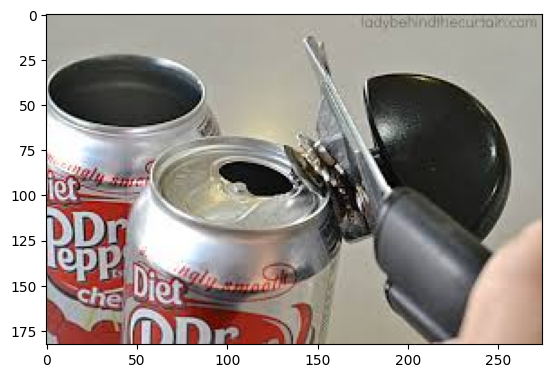

In [24]:
imr_r = mpimg.imread(path_recyclabe_list[nbr_recyclabe])
plt.imshow(imr_r)

# ImageDataGenerator

ImageDataGenerator permet de charger nos données test et train dans le dossier DATASET qui se trouve dans la racine

Le rescale tout en bas permet equivaut au SandardScaler qui fait une mise à l'echelle des pixels des images


In [26]:
train_data_generator = ImageDataGenerator(rescale=1/255.0)
test_data_generator = ImageDataGenerator(rescale=1/255.0)

directory : Chemin d'accès au dossier

target_size : taille des images (les images au départ ne sont pas de même taille)

class_mode : il s'agit là d'une classification binaire

In [29]:
train_dir ="DATASET/TRAIN/"
test_dir ="DATASET/TEST/"

In [65]:
img_train = train_data_generator.flow_from_directory(directory= train_dir,
                                                     target_size=(255,255),
                                                     batch_size=32,
                                                     class_mode="binary")

img_test = test_data_generator.flow_from_directory(directory= test_dir,
                                                     target_size=(255,255),
                                                     batch_size=32,
                                                     class_mode="binary")

Found 22564 images belonging to 2 classes.
Found 2515 images belonging to 2 classes.


In [31]:
img_train.class_indices

{'O': 0, 'R': 1}

In [71]:
len(img_test)

79

In [60]:
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)
best_model = "classification_binaire.keras"
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath=best_model,
                                               monitor="val_accuracy",
                                               mode = "max",save_best_only=True)

In [72]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(255,255,3)))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.15))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))  

In [73]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.00000000001),
    metrics=["accuracy"]
)

In [74]:
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 255, 255, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 127, 127, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 125, 125, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 60, 60, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,177 (5.59 MB)

 Trainable params: 1,466,177 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
history = model.fit(img_train, epochs= 50, validation_data= img_test, callbacks=[ stop, model_ckp])

Epoch 1/50


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 60/706 ━━━━━━━━━━━━━━━━━━━━ 1:26:55 8s/step - accuracy: 0.4774 - loss: 0.6942

KeyboardInterrupt: 

In [68]:
len(img_train)

706

SyntaxError: invalid syntax (2490086425.py, line 1)

In [77]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [2]:
import tensorflow as tf

# Vérifiez la présence du GPU
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("Utilisation du GPU activée.")
else:
    print("Aucun GPU détecté.")

# Créez et compilez votre modèle ici
# ...

# Entraînez votre modèle
# ...


Aucun GPU détecté.
